In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('pr1.mplstyle')

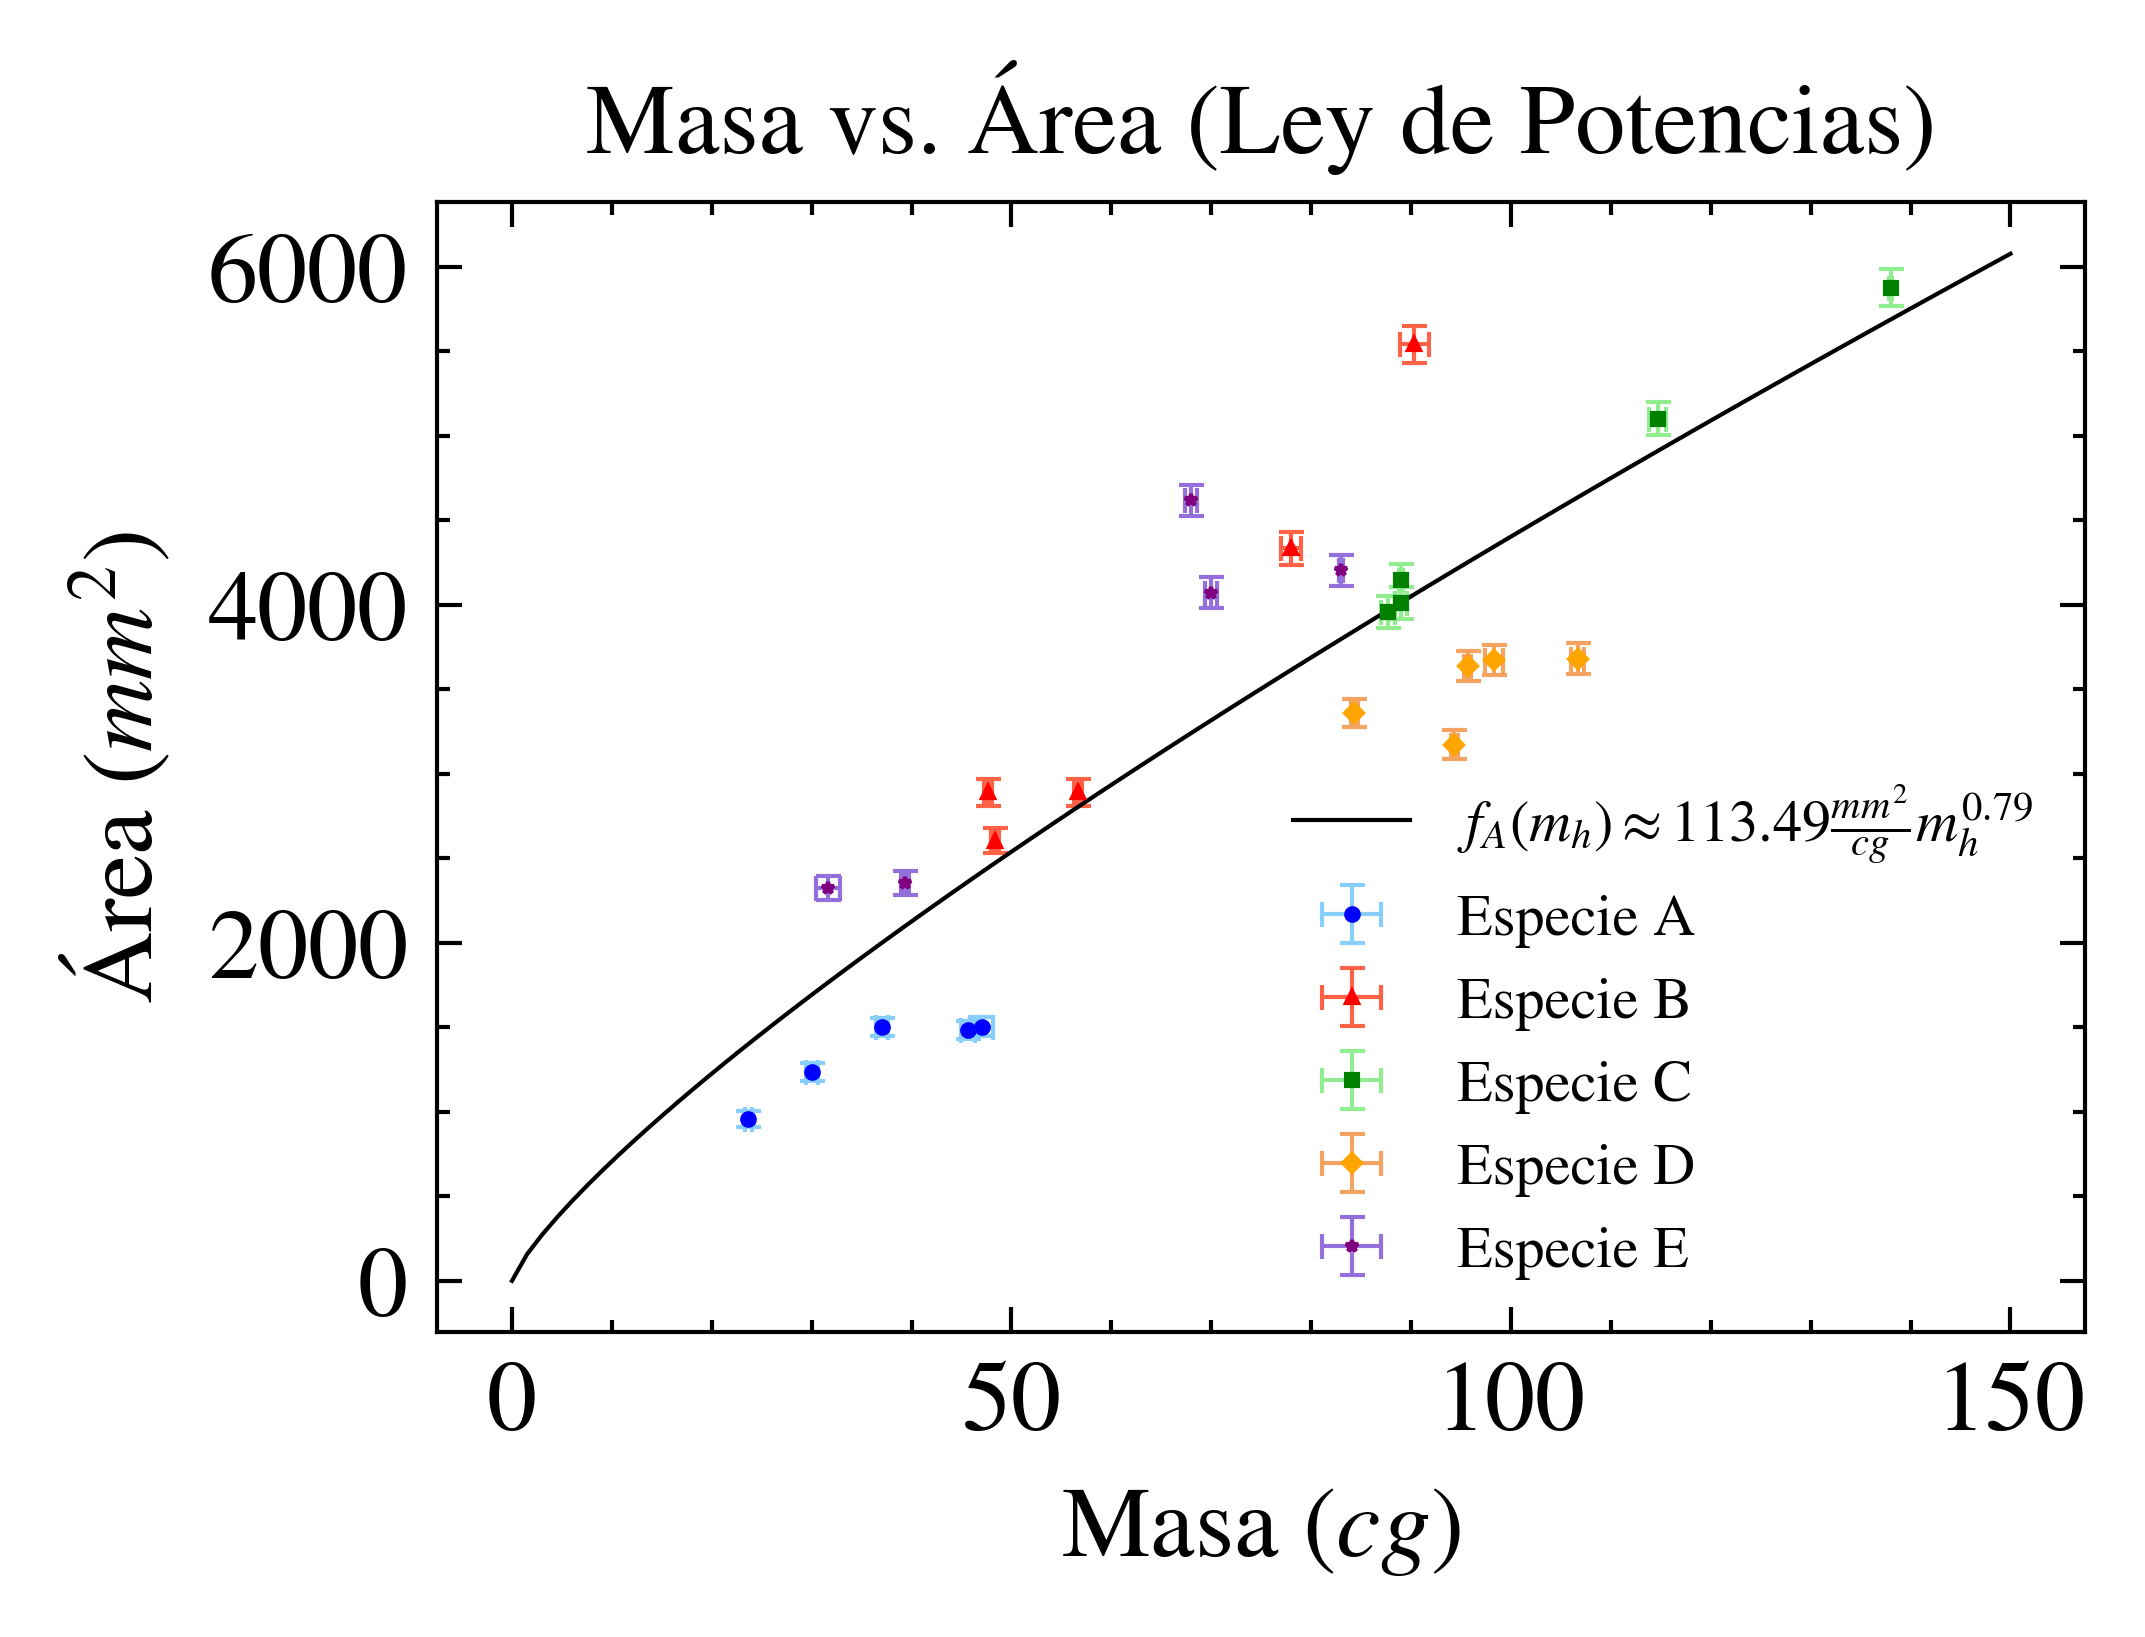

In [233]:
def linear(x, m, b):
    return m * x + b
# read leaves.csv
leaves = pd.read_csv('leaves.csv', sep=',')

# calculate area approximating by an ellipse
leaves['area'] = leaves['length'] * leaves['width'] * np.pi / 4

# calculate area error of approximating by an ellipse
leaves['area_error'] = np.sqrt(leaves['length']**2 + leaves['width']**2) * np.pi / 4

# multiply weight by 1e2
leaves['weight1'] = leaves['weight1'] * 1e2
leaves['weight2'] = leaves['weight2'] * 1e2
leaves['weight3'] = leaves['weight3'] * 1e2
leaves['weight'] = pd.concat([leaves['weight1'], leaves['weight2'], leaves['weight3']], axis=1).mean(axis=1)

# calculate weight error
leaves['weight_error'] = np.sqrt(3*(1e-1**2) + pd.concat([leaves['weight1'], leaves['weight2'], leaves['weight3']], axis=1).var(axis=1) / 3)

# plot weight vs area with errorbar and linear regression
# fig, ax = plt.subplots()
clases = [('A', 'Especie A', 'blue', 'lightskyblue', 'o'), ('B', 'Especie B', 'red', 'tomato', '^'), ('C', 'Especie C', 'green', 'lightgreen', 's'), ('D', 'Especie D', 'orange', 'sandybrown', 'D'), ('E', 'Especie E', 'purple', 'mediumpurple', '*')]
# ax.errorbar(leaves['weight'], leaves['area'], xerr=leaves['weight_error'], yerr=leaves['area_error'], fmt='o', capsize=1.5, color='black', ecolor='black', elinewidth=.5, markeredgewidth=.5, ms=2)

# for clase in clases:
#     ax.errorbar(leaves[leaves['class'] == clase[0]]['weight'], leaves[leaves['class'] == clase[0]]['area'], xerr=leaves[leaves['class'] == clase[0]]['weight_error'], yerr=leaves[leaves['class'] == clase[0]]['area_error'], fmt='o', capsize=1.5, color=clase[2], ecolor=clase[2], elinewidth=.5, markeredgewidth=.5, ms=2, label=clase[1])
# popt, pcov = np.polyfit(leaves['weight'], leaves['area'], 1, cov=True)
# x = np.linspace(0, 150, 100)
# ax.plot(x, linear(x, *popt), color='black', linewidth=.5, label=f'$y = {popt[0]:.2f}x + {popt[1]:.2f}$')
# ax.set_xlabel('Masa ($cg$)')
# ax.set_ylabel('Área ($cm^2$)')
# ax.set_title('Masa vs. Área')
# # ax.legend()
# plt.show()

# display(leaves)

from scipy.optimize import curve_fit

#powe law
def power(x, a, b):
    return a * x**b

# plot weight vs area with errorbar and power law regression
fig, ax = plt.subplots()

for clase in clases:
    ax.errorbar(leaves[leaves['class'] == clase[0]]['weight'], leaves[leaves['class'] == clase[0]]['area'], xerr=leaves[leaves['class'] == clase[0]]['weight_error'], yerr=leaves[leaves['class'] == clase[0]]['area_error'], fmt=clase[4], capsize=1.5, color=clase[2], ecolor=clase[3], elinewidth=.5, markeredgewidth=.5, ms=1.5, label=clase[1])
popt, pcov = curve_fit(power, leaves['weight'], leaves['area'])
x = np.linspace(0, 150, 100)
ax.plot(x, power(x, *popt), color='black', linewidth=.5, label=f'$f_A(m_h) \\approx {popt[0]:.2f}\\frac{{mm^2}}{{cg}}m_h^{{{popt[1]:.2f}}}$')
ax.set_xlabel('Masa ($cg$)')
ax.set_ylabel('Área ($mm^2$)')
ax.set_title('Masa vs. Área (Ley de Potencias)')
ax.legend(fontsize=7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('power_law.pdf')

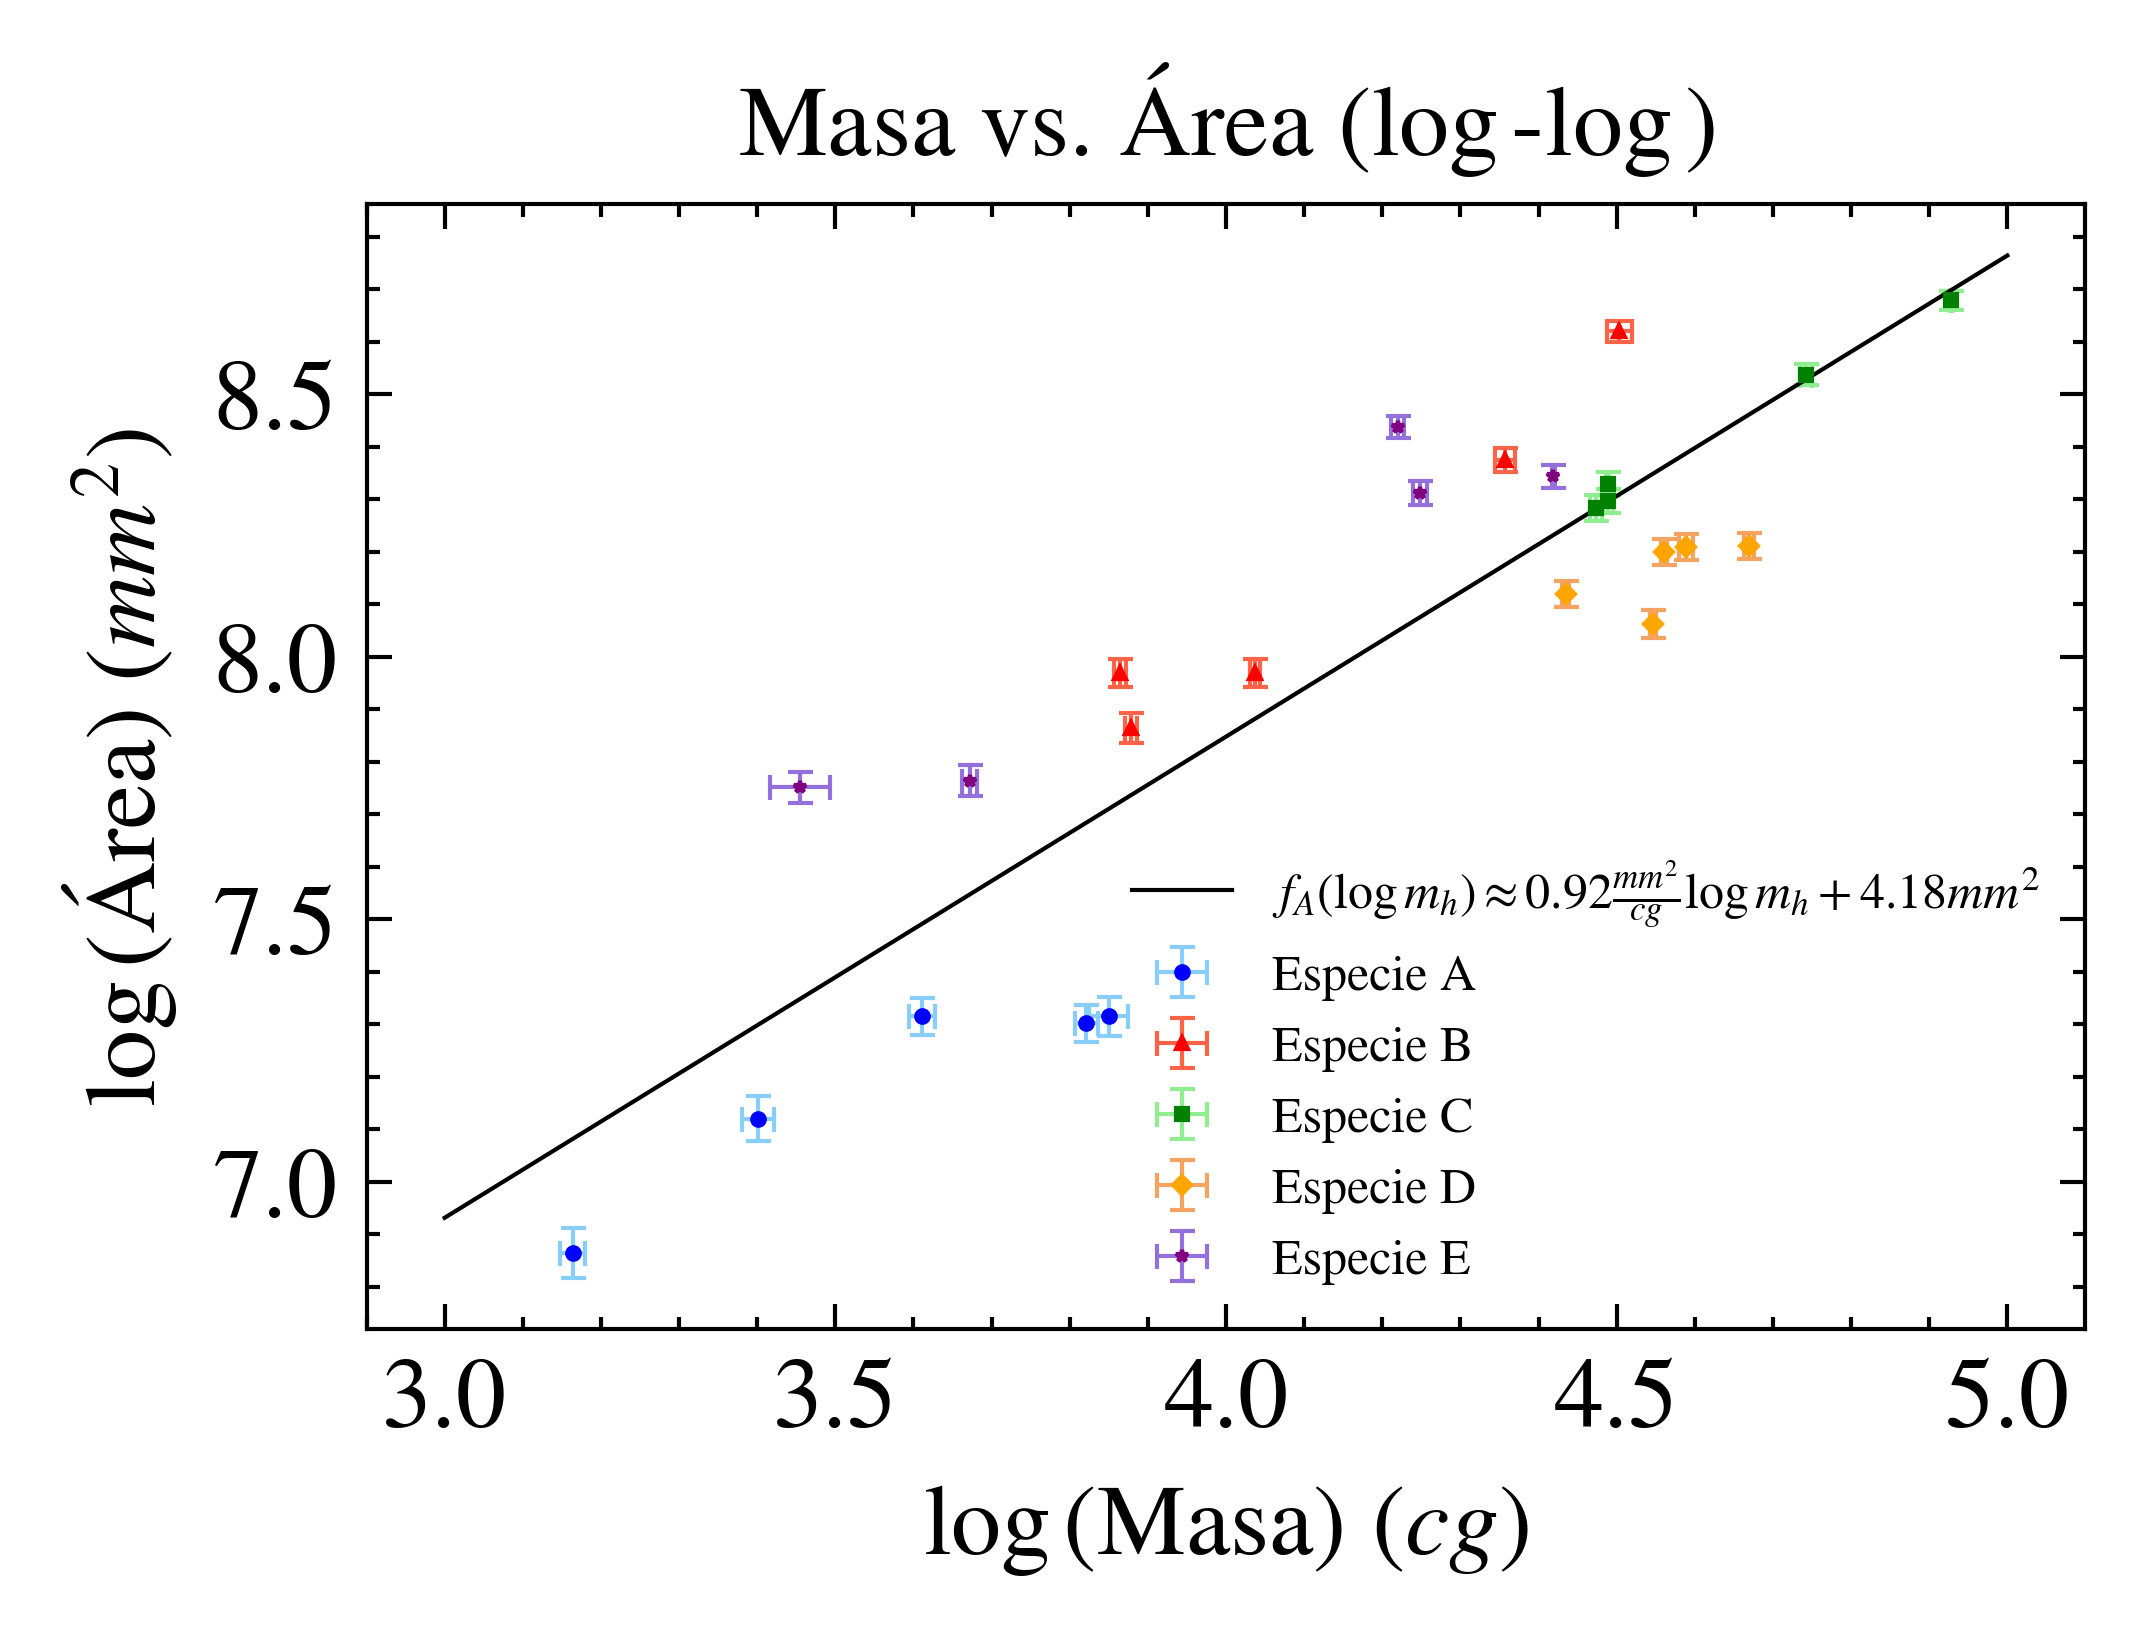

In [234]:
#log log plot
logx = np.log(leaves['weight'])
logy = np.log(leaves['area'])
logxerr = leaves['weight_error'] / leaves['weight']
logyerr = leaves['area_error'] / leaves['area']

# plot log weight vs log area with errorbar and linear regression
fig, ax = plt.subplots()
for clase in clases:
    ax.errorbar(np.log(leaves[leaves['class'] == clase[0]]['weight']), np.log(leaves[leaves['class'] == clase[0]]['area']), xerr=logxerr[leaves['class'] == clase[0]], yerr=logyerr[leaves['class'] == clase[0]], fmt=clase[4], capsize=1.5, color=clase[2], ecolor=clase[3], elinewidth=.5, markeredgewidth=.5, ms=1.5, label=clase[1])
popt, pcov = np.polyfit(logx, logy, 1, cov=True)
x = np.linspace(3, 5, 100)
ax.plot(x, linear(x, *popt), color='black', linewidth=.5, label=f'$f_A(\log{{m_h}}) \\approx {popt[0]:.2f}\\frac{{mm^2}}{{cg}}\log{{m_h}} + {popt[1]:.2f}mm^2$')
ax.set_xlabel(f'$\log$(Masa) ($cg$)')
ax.set_ylabel(f'$\log$(Área) ($mm^2$)')
ax.set_title(f'Masa vs. Área ($\log$-$\log$)')
ax.legend(fontsize=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('log_log.pdf')
